In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
from math import sqrt

In [ ]:
import warnings
warnings.filterwarnings('ignore')

Importing the Boston House Price Dataset

In [ ]:
house_price_dataset = sklearn.datasets.load_boston()

Display the Raw Data Set 

In [ ]:
print(house_price_dataset)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

Loading the Dataset to a Pandas DataFrame.

In [ ]:
hd_set = pd.DataFrame(house_price_dataset.data, columns = house_price_dataset.feature_names)


Print first 5 rows of our DataFrame

In [ ]:
hd_set.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
hd_set.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [ ]:
hd_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


Add the target(price) column to the DataFrame.

In [ ]:
hd_set['price'] = house_price_dataset.target

Print first 5 rows of our DataFrame

In [ ]:
hd_set.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Checking the number of rows and columns in the dataset

In [ ]:
hd_set.shape

(506, 14)

Checking for missing values

In [ ]:
hd_set.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64

Statistical measures of the dataset


In [ ]:
hd_set.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Undstanding the Co-Relation between various features in the datasets

Postive Correlation
 
Negative Correlation 

In [ ]:
correlation = hd_set.corr()

Constructed a heatmap  to understand the correlation 

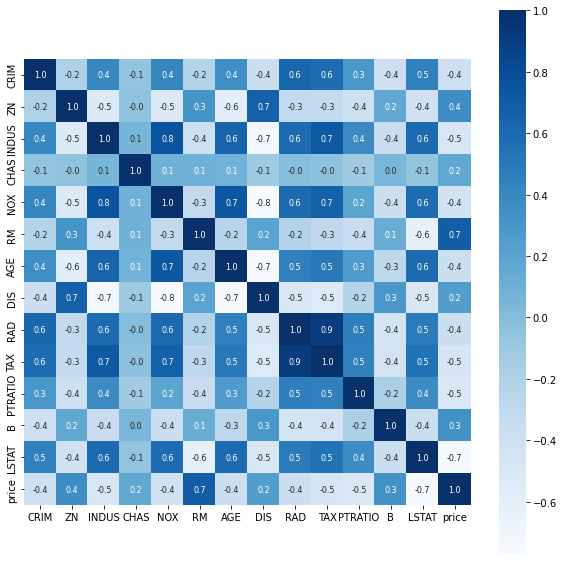

In [ ]:
plt.figure(figsize = (10, 10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

Split the data_set in Data and Target

In [ ]:
X = hd_set.drop(['price'], axis = 1)
Y = hd_set['price']

In [ ]:
print(X, Y, sep = '\n\n')

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       1

Splitting the data into Training data and Test data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(506, 13) (404, 13) (102, 13)


In [ ]:
print(X_test)

         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS   RAD    TAX  \
463   5.82115   0.0  18.10   0.0  0.713  6.513  89.9  2.8016  24.0  666.0   
152   1.12658   0.0  19.58   1.0  0.871  5.012  88.0  1.6102   5.0  403.0   
291   0.07886  80.0   4.95   0.0  0.411  7.148  27.7  5.1167   4.0  245.0   
183   0.10008   0.0   2.46   0.0  0.488  6.563  95.6  2.8470   3.0  193.0   
384  20.08490   0.0  18.10   0.0  0.700  4.368  91.2  1.4395  24.0  666.0   
..        ...   ...    ...   ...    ...    ...   ...     ...   ...    ...   
200   0.01778  95.0   1.47   0.0  0.403  7.135  13.9  7.6534   3.0  402.0   
12    0.09378  12.5   7.87   0.0  0.524  5.889  39.0  5.4509   5.0  311.0   
129   0.88125   0.0  21.89   0.0  0.624  5.637  94.7  1.9799   4.0  437.0   
194   0.01439  60.0   2.93   0.0  0.401  6.604  18.8  6.2196   1.0  265.0   
320   0.16760   0.0   7.38   0.0  0.493  6.426  52.3  4.5404   5.0  287.0   

     PTRATIO       B  LSTAT  
463     20.2  393.82  10.29  
152     14.7  3

Model Training.

XGBoost Regressor

In [ ]:
# loading the model
model = XGBRegressor()

In [ ]:
# training the model with X_train
model.fit(X_train, Y_train)

[07:17:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
help(XGBRegressor)

Help on class XGBRegressor in module xgboost.sklearn:

class XGBRegressor(XGBModel, sklearn.base.RegressorMixin)
 |  XGBRegressor(max_depth=3, learning_rate=0.1, n_estimators=100, verbosity=1, silent=None, objective='reg:linear', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, colsample_bynode=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, importance_type='gain', **kwargs)
 |  
 |  Implementation of the scikit-learn API for XGBoost regression.
 |  
 |  Parameters
 |  ----------
 |  max_depth : int
 |      Maximum tree depth for base learners.
 |  learning_rate : float
 |      Boosting learning rate (xgb's "eta")
 |  n_estimators : int
 |      Number of trees to fit.
 |  verbosity : int
 |      The degree of verbosity. Valid values are 0 (silent) - 3 (debug).
 |  silent : boolean
 |      Whether to print messages while running boostin

Evaluation

Prediction on training data.

In [ ]:
# accuracy for prediction on training data.
training_data_prediction = model.predict(X_train)

In [ ]:
print(training_data_prediction)

[23.360205  22.462858  20.84804   33.77895   15.333282  13.616525
 21.71274   15.175322  11.724756  21.836252  16.08508    7.52517
 31.094206  48.56228   32.623158  20.546066  22.177324  20.500404
 31.666502  20.551508  25.74269    8.247894  45.200817  22.069397
 20.698004  20.100042  19.873472  26.242834  23.39618   31.927258
 21.493471   9.280926  18.504272  21.87202   12.504413  10.578829
 13.054951  23.541336  19.164755  15.888303  23.768887  28.454714
 15.539753  18.049202  16.23671   14.08383   25.33273   17.575668
 49.566467  16.990675  21.738977  32.935143  16.125738  22.45393
 20.776966  20.042227  22.898897  38.124043  30.607079  32.607468
 20.919416  47.348038  14.524615   8.126455  19.581661   9.030508
 26.462107  17.69918   20.546162  46.312218  39.689137  34.387108
 22.11083   34.568977  24.873934  50.078335  14.5669775 20.525211
 20.62971   23.202105  49.514477  23.12061   24.795782  20.319666
 43.869396  17.110266  32.165016  34.75202    7.313497  20.309446
 18.038298  

Compare Prediction with Original Value. 

In [ ]:
# R squared Error.
score_1 = metrics.r2_score(Y_train, training_data_prediction)

# Mean Absolute Error.
score_2 = metrics.mean_squared_error(Y_train, training_data_prediction)
# Mean Squared Error.
score_3 = sqrt(score_2)

#print the values
print("R squared error : ", score_1)
print("Mean squared error : ", score_2)
print("root mean squared error : ", score_3)

R squared error :  0.9733349094832763
Mean squared error :  2.25506404365286
root mean squared error :  1.5016870658205923


Visualizing the actual Prices and Predicted Price

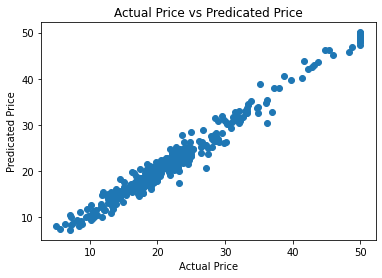

In [ ]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicated Price")
plt.title("Actual Price vs Predicated Price")
plt.show()

Predication on Test Data

In [ ]:
#accuary for prediciton on test data
test_data_prediction = model.predict(X_test)

In [ ]:
# R squared Error.
score_1 = metrics.r2_score(Y_test, test_data_prediction)

# Mean Absolute Error.
score_2 = metrics.mean_squared_error(Y_test, test_data_prediction)

# Mean Squared Error.
score_3 = sqrt(score_2)

#print the values
print("R squared error : ", score_1)
print("Mean squared error : ", score_2)
print("root mean squared error : ", score_3)

R squared error :  0.9115937697657654
Mean squared error :  7.3960370952309304
root mean squared error :  2.719565607818817


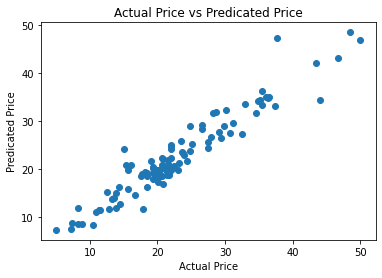

In [ ]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicated Price")
plt.title("Actual Price vs Predicated Price")
plt.show()

In [ ]:
model.score(X_test, Y_test)

0.9115937697657654

In [ ]:
X_train.head(15)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
321,0.18159,0.0,7.38,0.0,0.493,6.376,54.3,4.5404,5.0,287.0,19.6,396.90,6.87
37,0.08014,0.0,5.96,0.0,0.499,5.850,41.5,3.9342,5.0,279.0,19.2,396.90,8.77
286,0.01965,80.0,1.76,0.0,0.385,6.230,31.5,9.0892,1.0,241.0,18.2,341.60,12.93
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
25,0.84054,0.0,8.14,0.0,0.538,5.599,85.7,4.4546,4.0,307.0,21.0,303.42,16.51
457,8.20058,0.0,18.10,0.0,0.713,5.936,80.3,2.7792,24.0,666.0,20.2,3.50,16.94
120,0.06899,0.0,25.65,0.0,0.581,5.870,69.7,2.2577,2.0,188.0,19.1,389.15,14.37
488,0.15086,0.0,27.74,0.0,0.609,5.454,92.7,1.8209,4.0,711.0,20.1,395.09,18.06
427,37.66190,0.0,18.10,0.0,0.679,6.202,78.7,1.8629,24.0,666.0,20.2,18.82,14.52
358,5.20177,0.0,18.10,1.0,0.770,6.127,83.4,2.7227,24.0,666.0,20.2,395.43,11.48


In [ ]:
XL_train = X_train.values

In [ ]:
XL_train.size

5252

In [ ]:
Y_train

321    23.1
37     21.0
286    20.1
2      34.7
25     13.9
       ... 
22     15.2
72     22.8
493    21.8
15     19.9
168    23.8
Name: price, Length: 404, dtype: float64

In [ ]:
print(Y_train.shape)

(404,)


In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(XL_train, Y_train)


LinearRegression()

In [ ]:
# R squared Error.
score_1 = metrics.r2_score(Y_train, lr.predict(XL_train))

# Mean Absolute Error.
score_2 =metrics.mean_squared_error(Y_train, lr.predict(XL_train))
score_3 =sqrt(score_2)
#print the values
print("R squared error : ", score_1)
print("Mean squared error : ", score_2)
print("root mean square error : ", score_3)

R squared error :  0.7285831776605591
Mean squared error :  22.953693576112883
root mean square error :  4.791001312472465


In [ ]:
print(lr.coef_, lr.intercept_, sep = "\n\n")


[-1.08223557e-01  3.89039349e-02 -1.51517627e-02  3.15897941e+00
 -1.65854070e+01  3.63288486e+00  9.35052187e-03 -1.38618151e+00
  3.24065945e-01 -1.16245167e-02 -1.03644251e+00  1.16127489e-02
 -5.58409340e-01]

37.19980774264986


In [ ]:
lr_predication = lr.predict(X_test)
lr_predication

array([23.01506153, 21.2115869 , 33.71590384, 31.56542369,  3.1826268 ,
        3.15381954, 27.40305304, 22.2126176 , 14.86506114, 21.34105453,
       30.95942941, 26.70065029, 21.12624382, 18.37282564, 17.64315354,
       25.38194186, 24.42970445, 13.36957057,  8.66686786, 18.57490534,
       21.73966467, 20.34270529, 36.5461105 , 20.59627495, 19.87979627,
       15.75766967, 37.11632999, 34.85897895, 30.83458635, 23.23441285,
       18.68278505, 20.749546  , 31.84560076, 30.20214207, 13.3861702 ,
       15.87078398, 13.70766096, 23.74163998, 25.95135088, 23.18325878,
       28.99906539, 12.50341936, 31.08347911,  6.39401895, 23.71801218,
       20.61523929, 33.15362417, 19.21862493, 35.89603081,  0.82365329,
       31.90288611, 31.69640543,  6.58849712, 34.62762996, 20.41162545,
       19.69277608, 19.53445865, 18.58689088, 15.81420496, 22.98764309,
       19.65947045, 16.36377019, 18.48783369, 32.76568172, 35.49022568,
       24.58349631, 41.5854766 , 32.94818456, 14.60990256, 27.43

In [ ]:
Y_test


463    20.2
152    15.3
291    37.3
183    32.5
384     8.8
       ... 
200    32.9
12     21.7
129    14.3
194    29.1
320    23.8
Name: price, Length: 102, dtype: float64

In [ ]:
lr.score(X_test, Y_test)

0.7789207451814417

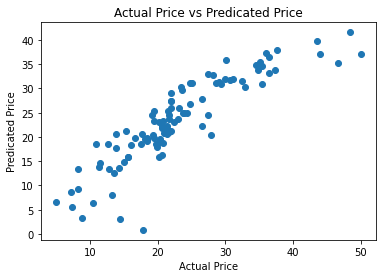

In [ ]:
plt.scatter(Y_test, lr_predication)
plt.xlabel("Actual Price")
plt.ylabel("Predicated Price")
plt.title("Actual Price vs Predicated Price")
plt.show()

In [ ]:
# R squared Error.
score_1 = metrics.r2_score(Y_test, lr_predication)

# Mean Absolute Error.
score_2 =metrics.mean_squared_error(Y_test, lr_predication)
score_3 =sqrt(score_2)
#print the values
print("R squared error : ", score_1)
print("Mean square error : ", score_2)
print("Root mean square error : ", score_3)

R squared error :  0.7789207451814417
Mean square error :  18.495420122448397
Root mean square error :  4.300630200615765


Polynomial Regression.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
xpr = poly_reg.fit_transform(XL_train)
xpt = poly_reg.fit_transform(X_test)
lr1 = LinearRegression()
lr1.fit(xpr, Y_train)
lr1.predict(xpr)

array([24.96467075, 22.30011664, 20.13046339, 33.36445924, 14.80021962,
       11.60788649, 21.77279052, 14.08308115, 11.07369013, 22.27392456,
       18.98547221,  5.61626759, 31.22010884, 33.11998289, 32.9787565 ,
       19.90224961, 22.17444516, 20.19023711, 30.84103942, 23.68124849,
       32.59535345,  5.90844496, 44.83048405, 20.3420147 , 18.31685343,
       18.30923774, 17.82146225, 23.16307198, 22.64998398, 35.09923611,
       22.07081081,  7.82723225, 15.75390946, 25.28973196, 13.76997454,
        7.27249669, 16.71734602, 23.76076225, 16.5712299 , 14.98653042,
       25.03569251, 28.90542113, 16.40047065, 14.83570908, 14.2230767 ,
       15.11634195, 26.77237667, 20.61791417, 50.30234886, 16.89987667,
       22.25702233, 32.51958022, 15.64593877, 21.59001309, 19.80615028,
       20.59026837, 23.82906108, 36.92888224, 30.04523697, 32.87974391,
       19.35316896, 51.73635382, 13.26586728,  1.96592672, 15.55342129,
        9.13609268, 27.88640412, 18.06814387, 21.95412056, 45.09

In [ ]:
# R squared Error.
score_1 = metrics.r2_score(Y_train, lr1.predict(xpr))

# Mean Absolute Error.
score_2 =metrics.mean_squared_error(Y_train, lr1.predict(xpr))
score_3 =sqrt(score_3)
#print the values
print("R squared : ", score_1)
print("Mean squared error : ", score_2)
print("Root mean square error : ", score_3)

R squared :  0.9295925088768032
Mean squared error :  5.954354497171129
Root mean square error :  2.073796084627359


In [ ]:
print(lr1.predict(xpr), Y_train, sep = "\n\n")
print(xpr.shape, Y_train.shape, sep = '\t')

[24.96467075 22.30011664 20.13046339 33.36445924 14.80021962 11.60788649
 21.77279052 14.08308115 11.07369013 22.27392456 18.98547221  5.61626759
 31.22010884 33.11998289 32.9787565  19.90224961 22.17444516 20.19023711
 30.84103942 23.68124849 32.59535345  5.90844496 44.83048405 20.3420147
 18.31685343 18.30923774 17.82146225 23.16307198 22.64998398 35.09923611
 22.07081081  7.82723225 15.75390946 25.28973196 13.76997454  7.27249669
 16.71734602 23.76076225 16.5712299  14.98653042 25.03569251 28.90542113
 16.40047065 14.83570908 14.2230767  15.11634195 26.77237667 20.61791417
 50.30234886 16.89987667 22.25702233 32.51958022 15.64593877 21.59001309
 19.80615028 20.59026837 23.82906108 36.92888224 30.04523697 32.87974391
 19.35316896 51.73635382 13.26586728  1.96592672 15.55342129  9.13609268
 27.88640412 18.06814387 21.95412056 45.09616247 40.72301062 37.96071881
 18.64798214 32.8171173  24.04259476 49.04790925 15.72706271 19.33089677
 23.01861152 25.70097533 47.99255203 22.47017241 28.

In [ ]:
lr1.score(xpr, Y_train)

0.9295925088768032

In [ ]:
lr1.predict(xpt)

array([22.66995447, 11.98571418, 33.46579216, 31.3901785 , 11.48148761,
       17.06840817, 26.49513931, 26.36747636, 20.38229474, 22.02103995,
       33.42005707, 23.13661476, 18.17279295,  9.4173739 , 12.61895258,
       23.19023472, 19.35284987, 11.0384055 ,  8.49110001, 13.85800193,
       24.74475012, 19.56912543, 34.71724827, 19.546126  , 17.1864305 ,
       12.09211863, 46.34079361, 33.66209227, 31.02889203, 17.7532168 ,
       22.38903585, 22.26079883, 31.59756823, 27.44452096, 10.55664572,
       14.54123646, 12.45359491, 14.96719415, 25.79893419, 20.91686068,
       26.07370271, 13.46191179, 31.70967582,  8.40072894, 22.68961252,
       19.59982745, 33.95428374, 15.63574644, 30.94478601, 12.15465243,
       32.47736221, 30.32275141,  3.83572609, 35.64858249, 26.43519448,
       17.77370269, 20.4748173 , 17.64287237, 15.26460571, 23.743317  ,
       17.48966323, 20.14098479, 18.09807856, 33.04764671, 36.30322793,
       24.24972876, 46.78320007, 27.99981426, 15.0542754 , 22.35

In [ ]:
lr1.score(xpt, Y_test)

0.8963635527163505

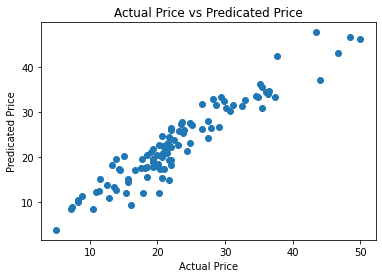

In [ ]:
plt.scatter(Y_test, lr1.predict(xpt))
plt.xlabel("Actual Price")
plt.ylabel("Predicated Price")
plt.title("Actual Price vs Predicated Price")
plt.show()

In [ ]:
# R squared Error.
score_1 = metrics.r2_score(Y_test, lr1.predict(xpt))

# Mean Absolute Error.
score_3 = metrics.mean_squared_error(Y_test, lr1.predict(xpt))
score_3 = sqrt(score_3)
#print the values
print("R squared error : ", score_1)
print("Mean square error : ", score_2)
print("Root mean square error : ", score_3)

R squared error :  0.8963635527163505
Mean square error :  5.954354497171129
Root mean square error :  2.9445190113394
